In [1]:
import spacy
from spacy import displacy


In [18]:
%run -i "../util/lang_utils.ipynb"
%run -i "../util/file_utils.ipynb"

In [6]:
input_text = "Mary gave John a book on Monday."
doc = small_model(input_text)

In [15]:
# Plot the dependency parse with custom options
options ={"add_lemma": True,
          "compact": True,
          "collapse_punct": True,
          "distance": 80,}
displacy.render(doc, style="dep", jupyter=True, options=options)

In [12]:
# Save the visualization to a file
from pathlib import Path
path = "../reports/dep_parse_vis.svg"
svg = displacy.render(doc, style="dep", options=options, jupyter=False)
output_path = Path(path)
output_path.open("w", encoding="utf-8").write(svg)

6233

In [16]:
input_text_list = "Mary gave John a book on Monday. However, John did not like the book and returned it to Mary shortly after."
doc = small_model(input_text_list)
displacy.render(list(doc.sents), style="dep", jupyter=True, options=options)

In [17]:
import matplotlib.pyplot as plt

In [19]:
text_file = "../data/sherlock_holmes.txt"
text = read_text_file(text_file)

In [20]:
# Define POS tags of interest
past_tas = ["VBD", "VBN"]  # Past tense verbs
present_tags = ["VBP", "VBZ", "VBG"]  # Present tense verbs

In [21]:
# Define a function to visualize verb tenses
def visualize_verbs(text, nlp):
    doc = nlp(text)
    verb_dict = {"Inf":0, "Past":0, "Present":0} # initialize verb tense counts
    for token in doc:
        if (token.tag_ == "VB"):
            verb_dict["Inf"] += 1
        elif (token.tag_ in past_tas):
            verb_dict["Past"] += 1
        elif (token.tag_ in present_tags):
            verb_dict["Present"] += 1
    # Plot the verb tense distribution
    labels = verb_dict.keys()
    counts = verb_dict.values()
    plt.bar(labels, counts, color=['blue', 'orange', 'green'])
    plt.xlabel('Verb Tenses')
    plt.ylabel('Counts')
    plt.title('Distribution of Verb Tenses')
    plt.show()

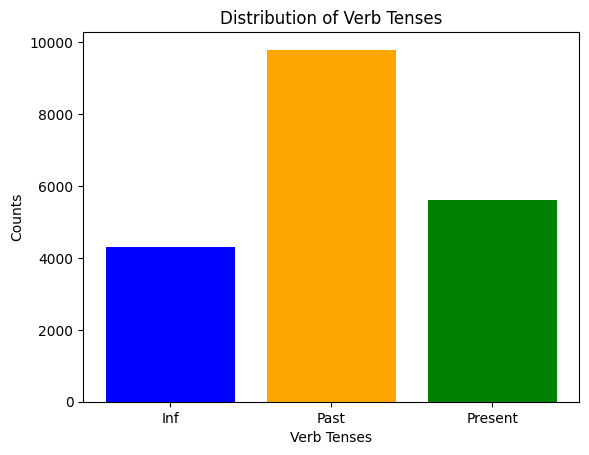

In [22]:
visualize_verbs(text, small_model)

In [26]:
# Define color scheme for NER visualization
colors = {"PERSON": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
          "ORG": "linear-gradient(90deg, #fca99c, #fc9ce7)",
          "GPE": "linear-gradient(90deg, #9cfca3, #9ccffc)"}
options = {"ents": ["PERSON", "ORG", "GPE"], "colors": colors}


In [28]:
text_nvidia = """NVIDIA Hopper demand is exceptional, and sequentially, NVIDIA H200 sales increased significantly to double-digit billions, the fastest prod ramp in our company's history. The H200 delivers up to 2x faster inference performance and up to 50% improved TCO. Cloud service providers were approximately half of our data center sales with revenue increasing more than 2x year on year. CSPs deployed NVIDIA H200 infrastructure and high-speed networking with installations scaling to tens of thousands of DPUs to grow their business and serve rapidly rising demand for AI training and inference workloads.

NVIDIA H200-powered cloud instances are now available from AWS, CoreWeave, and Microsoft Azure, with Google Cloud and OCI coming soon. Alongside significant growth from our large CSPs, NVIDIA GPU regional cloud revenue jumped year on year as North America, India, and Asia Pacific regions ramped NVIDIA Cloud instances and sovereign cloud build-outs. Consumer Internet revenue more than doubled year on year as companies scaled their NVIDIA Hopper infrastructure to support next-generation AI models training, multimodal, and agentic AI, deep learning recommender engines, and generative AI inference and content creation workloads. NVIDIA Ampere and Hopper infrastructures are fueling inference revenue growth for customers.

NVIDIA is the largest inference platform in the world. Our large installed base and rich software ecosystem encourage developers to optimize for NVIDIA and deliver continued performance and TCO improvements. Rapid advancements in NVIDIA software algorithms boosted Hopper inference throughput by an incredible 5x in one year and cut time to first token by 5x. Our upcoming release of NVIDIA NIM will boost Hopper inference performance by an additional 2.4x.

"""

doc = small_model(text_nvidia)
displacy.render(doc, style="ent", jupyter=True, options=options)

In [29]:
# Save the NER visualization to a file
path = "../reports/ner_vis.html"
html = displacy.render(doc, style="ent", options=options, jupyter=False)
output_path = Path(path)
output_path.open("w", encoding="utf-8").write(html)


7107